In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import unicodedata
import scipy.stats as stat

In [19]:
Golflengtes = [706.5, 667.8, 587.5, 501.6, 471.3, 447.1]
#Golflengtes = [706.5*10**-9, 667.8*10**-9, 587.5*10**-9, 501.6*10**-9, 471.3*10**-9, 447.1*10**-9]

x = [] #x = Lambda^-2
for i in Golflengtes:
    x.append(i**-2)
    
alpha = np.deg2rad(60)
nulhoek = np.deg2rad(240)
hoeken = np.deg2rad([287.5, 287.5, 288, 289, 289.5, 290])
def brekingsindex(nulhoek, alpha, hoek):
    return np.sin(((hoek - nulhoek) + alpha)/2)/np.sin(alpha/2)
n = []
for i in hoeken:
    n.append(brekingsindex(nulhoek, alpha, i))
print(n)

[1.6128892085349658, 1.6128892085349658, 1.6180339887498951, 1.6282310367126385, 1.6332831103233583, 1.638304088577984]


In [20]:
def Fd(d,a): #fout op delta
    return np.cos((d+a)/2)/(2*np.sin(a/2))
def Fa(d,a): #fout op alpha
    return - (np.cos(a/2)*np.sin((d+a)/2)-np.sin(a/2)*np.cos((d+a)/2))/(2*(np.sin(a/2))**2)
def SigmaN(d,a,sD,sA): #fout op brekingsindex
    return np.sqrt(Fd(d,a)**2*sD**2+Fa(d,a)**2*sA**2)
DeltaSys = np.deg2rad(0.5) #systeemfout
sD = DeltaSys/np.sqrt(12)
sA = 0
sN = SigmaN(hoeken, alpha,sD,sA)
print(sN)

[ 0.00250419  0.00250419  0.00250537  0.00250757  0.0025086   0.00250958]


In [21]:
def model(x,B,C):
    return(C+B*x) # x = lambda^-2

x0 = [1*10**-9,1.6]

def chi2(x,y,param,s):
    som = 0
    for i in range(len(x)):
        som = som + ((y[i] - model(x[i],param[0],param[1]))/s[i])**2
    return som

#def chi2(x,y,param,s):
    #diff = y - model(x,param[0],param[1])
    #return np.sum((diff/s)**2)

chi2ftie = lambda param: chi2(x, n, param, sN)

result = opt.minimize(chi2ftie,x0)
B,C = result.x
print(B,C)

8757.11318772 1.59383997157


[706.5, 667.8, 587.5, 501.6, 471.3, 447.1]


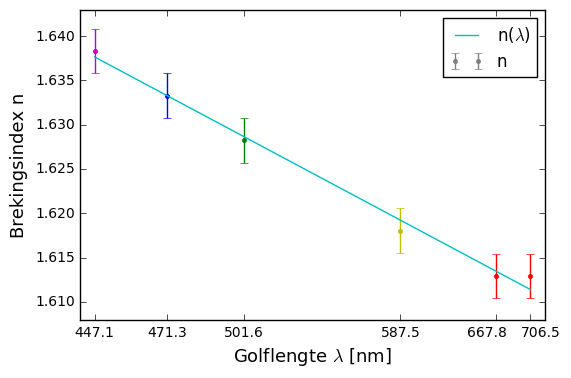

In [114]:
def model2(Lambda,B,C):
    r = []
    for i in Lambda:
        r.append(C+B*i)
    return(r)

print(Golflengtes)
G = np.linspace(min(x),max(x),200)

FigVi = plt.figure()
plt.errorbar(x[0:2], n[0:2], sN[0:2], fmt = 'r.')
plt.errorbar(x[2], n[2], sN[2], fmt = 'y.')
plt.errorbar(x[3], n[3], sN[3], fmt = 'g.')
plt.errorbar(x[4], n[4], sN[4], fmt = 'b.')
plt.errorbar(x[5], n[5], sN[5], fmt = 'm.')
plt.errorbar(0,0,0, fmt = '.', color = 'grey', label = "n")
plt.plot(G, model(G,B,C), "c", label = "n($\lambda$)")
plt.legend()
plt.xticks([2.0034368959950798e-06, 2.24236946337677e-06, 2.8972385694884564e-06, 3.974522357801128e-06, 4.5019961625885106e-06, 5.002541040721634e-06]
           , ['', '', 587.5, 501.6, 471.3, 447.1])
plt.axis([5.1*10**-6,1.9*10**-6, 1.608, 1.643])
plt.figtext(0.86, 0.082, str(706.5), color = 'black')
plt.figtext(0.77, 0.082, str(667.8), color = 'black')
plt.xlabel("Golflengte $\lambda$ [nm]", fontsize = 13)
plt.ylabel("Brekingsindex n", fontsize = 13)
#FigVi.savefig('Brekingsindex.png', dpi=400, bbox_inches='tight') 
plt.show()

In [113]:
v = len(x) - len([B,C])
pwaarde = 1 - stat.chi2.cdf(chi2ftie([B,C]), v)
print(str(pwaarde*100)+"%")

94.7224990588%


In [7]:
f = lambda b: chi2(x, n, [b,C], sN) - chi2(x, n, [B,C], sN) - 1
B1 = opt.fsolve(f,8760)[0]
B2 = opt.fsolve(f,8770)[0]
sB1 = B-B1
sB2 = B2-B
print(sB1,sB2)
print(sB1/B,sB2/B)

g = lambda c: chi2(x, n, [B,c], sN) - chi2(x, n, [B,C], sN) - 1
C1 = opt.fsolve(g,1)[0]
C2 = opt.fsolve(g,2)[0]
sC1 = C-C1
sC2 = C2-C
print(sC1,sC2)
print(sC1/C,sC2/C)

434.194794888 434.448814225
0.0495601304209 0.049589124853
0.00157734274338 0.00157739506331
0.000989656912229 0.000989689738818


In [110]:
Hoeken2 = np.deg2rad([288,288.5,290,291]) 
#.222253766478
Brekingsindexen = []
for i in Hoeken2:
    Brekingsindexen.append(brekingsindex(nulhoek,alpha,i))
print(Brekingsindexen)
print(SigmaN(Hoeken2, alpha, sD, sA))
def L(B,C,Brekingsindex):
    return (Brekingsindex-C)/B
Lambdas = []
for i in Brekingsindexen:
    Lambdas.append(L(B,C,i)**-0.5)
print(Lambdas)

[1.6180339887498951, 1.623147963930025, 1.638304088577984, 1.6482523772440318]
[ 0.00250537  0.00250649  0.00250958  0.0025114 ]
[601.62585124099655, 546.62242775742141, 443.78809261228764, 401.1728353144299]


In [111]:
#dit geeft fout op x, herscrhijf naar lambda aub
FoutBrekingsindexen = SigmaN(Hoeken2,alpha,sA,sD)
DLn = -1/(2*B*((Brekingsindexen-C)/B)**(3/2))
DLb = (Brekingsindexen-C)/(2*((Brekingsindexen-C)/B)**(3/2)*B**2)
DLc = 1/(2*B*((Brekingsindexen-C)/B)**(3/2))

DL = np.sqrt( (DLn*FoutBrekingsindexen)**2 + (DLb*sB1)**2 + (DLc*sC1)**2 )
print(DL)
print(DL/Lambdas)

[ 44.30403413  33.96408005  19.77340662  15.6011266 ]
[ 0.07364051  0.06213444  0.04455596  0.03888879]


In [109]:
#Geel:
print(str(578.2)+" in ["+str(Lambdas[0]-DL[0])+","+str(Lambdas[0]+DL[0])+"]")
#Groen:
print(str(546.1)+" in ["+str(Lambdas[1]-DL[1])+","+str(Lambdas[1]+DL[1])+"]")
#Blauw:
print(str(435.8)+" in ["+str(Lambdas[2]-DL[2])+","+str(Lambdas[2]+DL[2])+"]")
#Paars:
print(str(404.7)+" in ["+str(Lambdas[3]-DL[3])+","+str(Lambdas[3]+DL[3])+"]")

578.2 in [557.321817111,645.929885371]
546.1 in [512.658347709,580.586507806]
435.8 in [424.014685995,463.56149923]
404.7 in [385.571708716,416.773961913]
